# 1.Introduction

General comment: we will play around with zero-centered Gaussians to focus on the covariance matrix. The full formulas will be given in the slides.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm
from IPython.display import Markdown as md
# Global vars
dim = 2
n_points = 500

Function that plots two figures: (1) Data and Gaussian PDF contours and (2) 3D PDF + filled contours.

In [2]:
def plot_data_gaussian(data,covariance):
  # Axis and grid for plot
  my_axis = [-4, 4, -4, 4]
  my_x = np.linspace(my_axis[0],my_axis[1],num=50) # Sample x and y axis in 50 intervals
  my_y = np.linspace(my_axis[2],my_axis[3],num=50)
  [grid_x,grid_y] = np.meshgrid(my_x,my_y) # Build a grid to plot contours
  grid = np.dstack((grid_x, grid_y))
  # Prepare plot
  plt.figure(figsize=(16,8))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122,projection='3d')
  # Plot data
  ax1.plot(data[:,0],data[:,1],'g*',)
  # Compute pdf at grid and plot contour
  the_gaussian = multivariate_normal(mean=np.zeros(shape=(dim)),cov=covariance)
  grid_z = the_gaussian.pdf(grid)
  ax1.contour(grid_x,grid_y,grid_z,levels=[0.001,0.005,0.02,0.05,0.1],alpha=0.8,linewidths=2.5)
  ax1.axis('equal')
  ax1.axis(my_axis)
  ax1.set_xlabel('$x_1$')
  ax1.set_ylabel('$x_2$')
  # 3D plots
  ax2.plot_surface(grid_x,grid_y,grid_z, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.viridis)
  ax2.contourf(grid_x,grid_y,grid_z, zdir='z', offset=-0.15, cmap=cm.viridis)
  ax2.set_zlim(-0.15,0.2)
  ax2.set_zticks(np.linspace(0,0.2,5))
  ax2.view_init(azim=-90, elev=20)
  ax2.set_xlabel('$x_1$')
  ax2.set_ylabel('$x_2$')
  plt.show()
def print_matrix(matrix):
  print('\n'.join([''.join(['{:.3f}\t'.format(item) for item in row]) 
      for row in matrix]))

#2. Standard bivariate Gaussian

Generating data following a standard (bivariate) Gaussian.

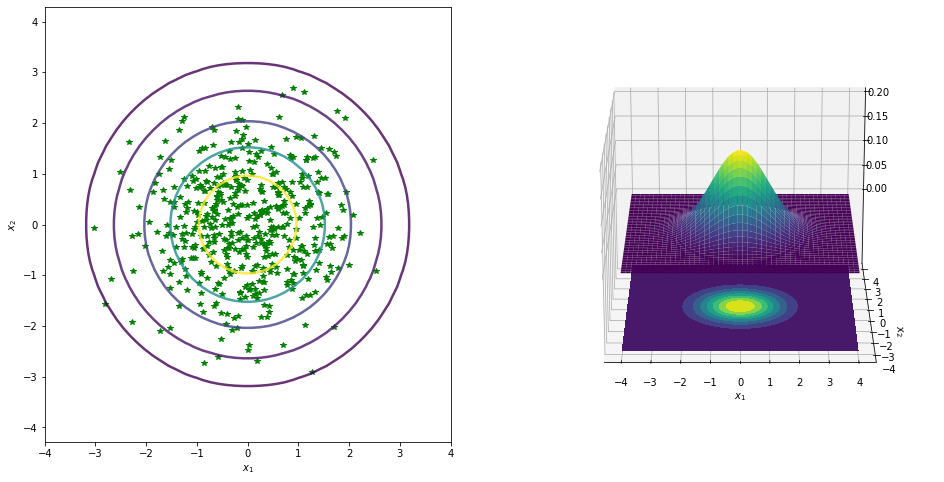

In [3]:
data = np.random.multivariate_normal(mean=np.zeros(shape=(dim)),cov=np.identity(dim),size=n_points)
plot_data_gaussian(data,np.identity(dim))

#3. Scaled bivariate Gaussian

Transform the data using different values for different dimensions. Estimate the new covariance matrix.
\begin{equation*}
\left(\begin{array}{c} x_{\textrm{new}} \\ y_{\textrm{new}} \end{array}\right) = 
\left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right) \cdot
\left(\begin{array}{c} x \\ y \end{array}\right)
\end{equation*}
The new covariance matrix is estimated via:
\begin{equation*}
\hat{\Sigma}_{\textrm{new}} = \frac{1}{N} \sum_{n=1}^N \left(\begin{array}{c} x_{\textrm{new}}^{(n)} \\ y_{\textrm{new}}^{(n)} \end{array}\right) \left(\begin{array}{cc} x_{\textrm{new}}^{(n)} & y_{\textrm{new}}^{(n)} \end{array}\right)
\end{equation*}


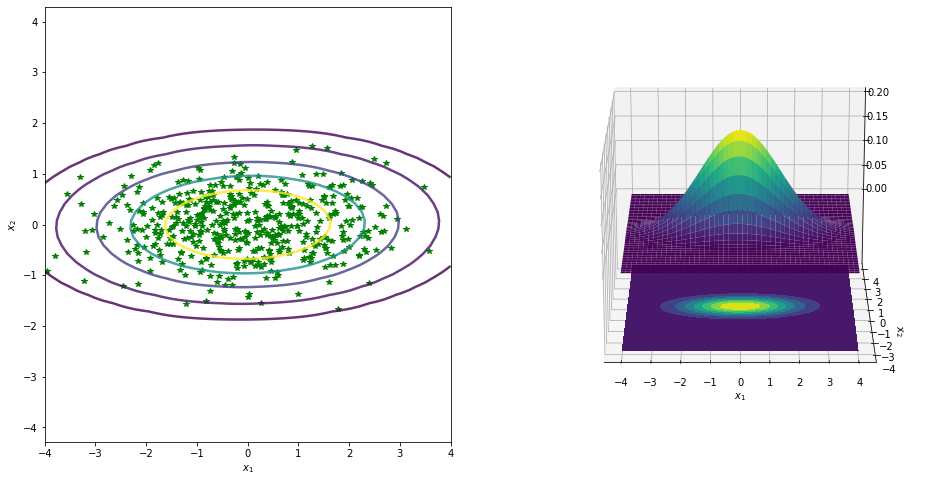

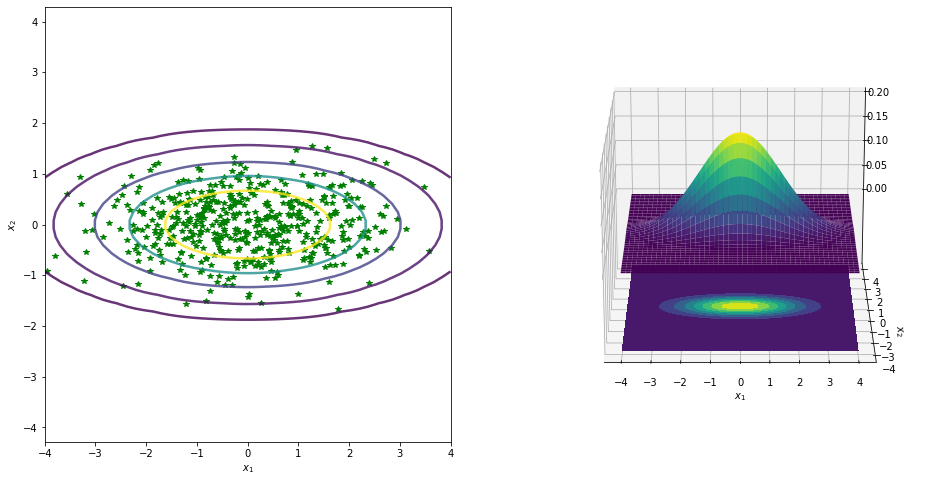

In [4]:
# Transformation
a_x = np.sqrt(2)
a_y = 1/np.sqrt(3)
a = np.zeros((dim,dim))
a[0,0] = a_x
a[1,1] = a_y
# Apply the transformation
data_new = np.transpose(np.matmul(a,np.transpose(data))) # The transpose is only because "data" are row vectors and not column vectors
# Estimate the new covariance matrix
cov_new = np.zeros((dim,dim))
for dd in range(data.shape[0]):
  cov_new += np.outer(data_new[dd,:],data_new[dd,:])
cov_new /= data.shape[0]
# Plot
plot_data_gaussian(data_new,cov_new)
true_cov = np.zeros((dim,dim))
true_cov[0,0] = a_x*a_x
true_cov[1,1] = a_y*a_y
plot_data_gaussian(data_new,true_cov)

In [5]:
print('Estimated covariance matrix')
print_matrix(cov_new)
print('True covariance matrix')
print_matrix(true_cov)

Estimated covariance matrix
1.926	0.027	
0.027	0.330	
True covariance matrix
2.000	0.000	
0.000	0.333	


The covariance matrix of the new random variable is:
\begin{equation*}
\Sigma_{\textrm{new}} = \underbrace{\left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right)}_{\text{scaling}} \cdot \underbrace{\Sigma}_{I_2} \cdot \underbrace{\left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right)^\top}_{\text{scaling}} = \left(\begin{array}{cc} a_x^2 & 0 \\ 0 & a_y^2 \end{array}\right)
\end{equation*}

#4. Rotated bivariate Gaussian

We are now going to rotate the data. In 2D, a rotation of angle $\theta$ can be expressed as follows:
\begin{equation*}
\left(\begin{array}{c} x_{\textrm{new}} \\ y_{\textrm{new}} \end{array}\right) = 
\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right) \cdot
\left(\begin{array}{c} x \\ y \end{array}\right)
\end{equation*}

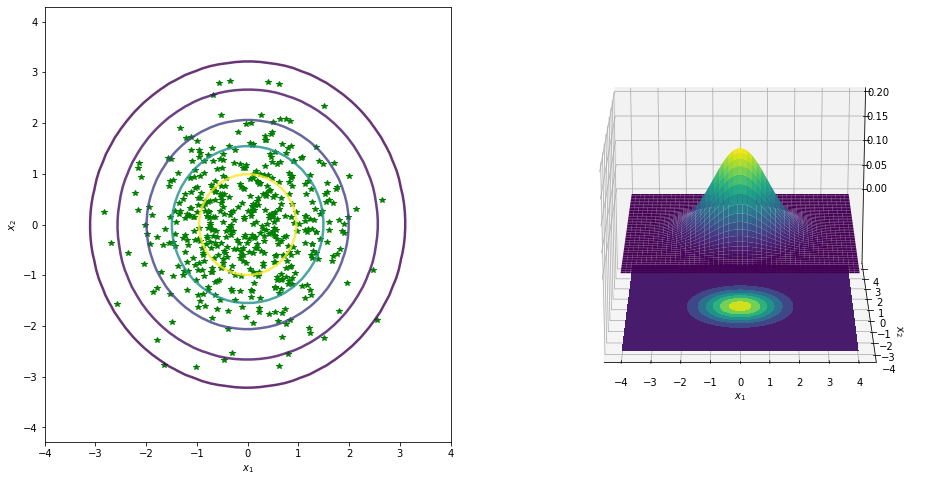

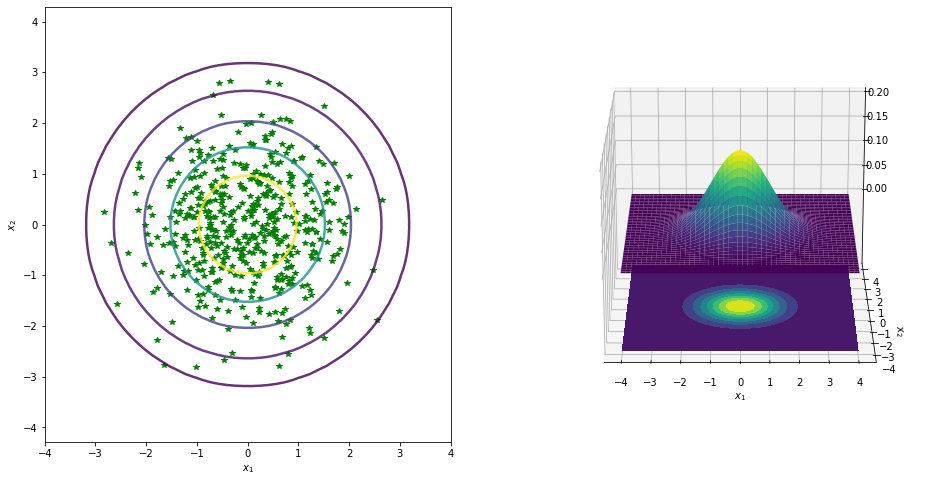

In [6]:
# Rotation of angle $\theta$
theta = 30*(np.pi/180)
a = np.zeros((dim,dim))
a[0,0] = np.cos(theta)
a[0,1] = -np.sin(theta)
a[1,0] = np.sin(theta)
a[1,1] = np.cos(theta)
# Apply the rotation
data_new = np.transpose(np.matmul(a,np.transpose(data)))
# Estimate the new covariance matrix
cov_new = np.zeros((dim,dim))
for dd in range(data.shape[0]):
  cov_new += np.outer(data_new[dd,:],data_new[dd,:])
cov_new /= data.shape[0]
# Plot
plot_data_gaussian(data_new,cov_new)
true_cov = np.zeros((dim,dim))
true_cov[0,0] = 1
true_cov[1,1] = 1
plot_data_gaussian(data_new,true_cov)

In [7]:
print('Estimated covariance matrix')
print_matrix(cov_new)
print('True covariance matrix')
print_matrix(true_cov)

Estimated covariance matrix
0.941	0.005	
0.005	1.012	
True covariance matrix
1.000	0.000	
0.000	1.000	


The covariance matrix of the new random variable is:
\begin{equation*}
\Sigma_{\textrm{new}} = \underbrace{\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right)}_{\text{rotation}} \cdot \underbrace{\Sigma}_{I_2} \cdot \underbrace{\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right)^\top}_{\text{rotation}} = I_2
\end{equation*}

#5. Scaled and rotated bivariate Gaussian

We are now combining both scaling and rotation (in that order):
\begin{equation*}
\left(\begin{array}{c} x_{\textrm{new}} \\ y_{\textrm{new}} \end{array}\right) = 
\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right) \cdot \left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right) \cdot
\left(\begin{array}{c} x \\ y \end{array}\right)
\end{equation*}

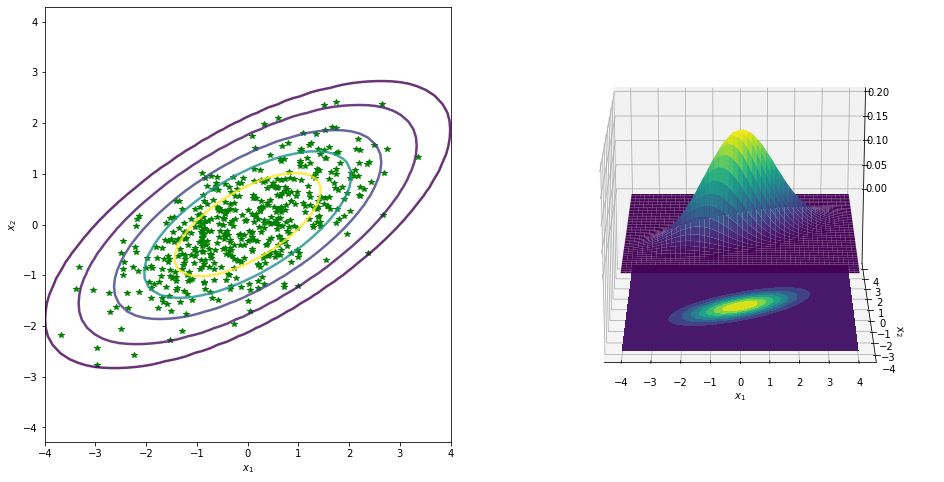

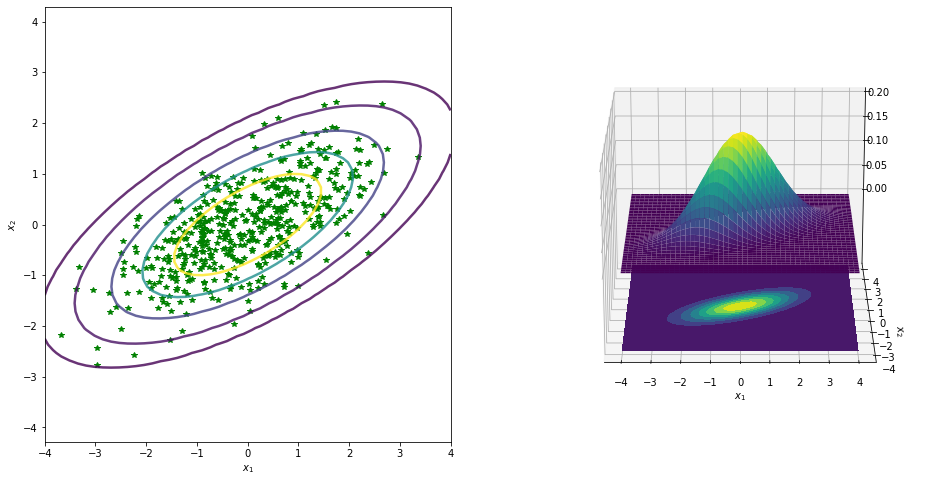

In [8]:
# Scaling
a_x = np.sqrt(2)
a_y = 1/np.sqrt(3)
a = np.zeros((dim,dim))
a[0,0] = a_x
a[1,1] = a_y
# Rotation of angle $\theta$
theta = 30*(np.pi/180)
b = np.zeros((dim,dim))
b[0,0] = np.cos(theta)
b[0,1] = -np.sin(theta)
b[1,0] = np.sin(theta)
b[1,1] = np.cos(theta)
# Apply the rotation
data_new = np.transpose(np.matmul(np.matmul(b,a),np.transpose(data)))
# Estimate the new covariance matrix
cov_new = np.zeros((dim,dim))
for dd in range(data.shape[0]):
  cov_new += np.outer(data_new[dd,:],data_new[dd,:])
cov_new /= data.shape[0]
# Plot
plot_data_gaussian(data_new,cov_new)
true_cov = np.matmul(b,a)
true_cov = np.matmul(true_cov,np.transpose(true_cov))
plot_data_gaussian(data_new,true_cov)

The covariance matrix of the new random variable is:
\begin{equation*}
\Sigma_{\textrm{new}} = \underbrace{\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right)}_{\text{rotation}} \cdot \underbrace{\left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right)}_{\text{scaling}} \cdot \underbrace{\Sigma}_{I_2} \cdot \underbrace{\left(\begin{array}{cc} a_x & 0 \\ 0 & a_y \end{array}\right)^\top}_{\text{scaling}} \cdot \underbrace{\left(\begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array}\right)^\top}_{\text{rotation}} = \left(\begin{array}{cc} a_x^2\cos^2(\theta)+a_y^2\sin^2(\theta) & (a_x^2-a_y^2)\sin(\theta)\cos(\theta) \\ (a_x^2-a_y^2)\sin(\theta)\cos(\theta) & a_x^2\sin^2(\theta)+a_y^2\cos^2(\theta) \end{array}\right)
\end{equation*}

In [9]:
print('Estimated covariance matrix')
print_matrix(cov_new)
print('True covariance matrix')
print_matrix(true_cov)

Estimated covariance matrix
1.504	0.704	
0.704	0.752	
True covariance matrix
1.583	0.722	
0.722	0.750	


#6 Generic linear transformation
We can transform the data with an invertible linear transformation $A$.
\begin{equation*}
\left(\begin{array}{c} x_{\textrm{new}} \\ y_{\textrm{new}} \end{array}\right) = 
A  \cdot
\left(\begin{array}{c} x \\ y \end{array}\right), \qquad \textrm{det}(A)\neq 0.
\end{equation*}

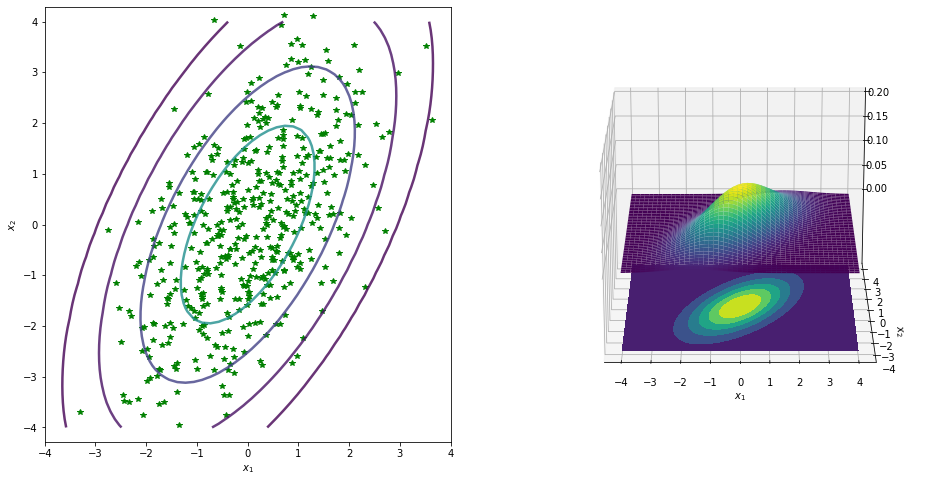

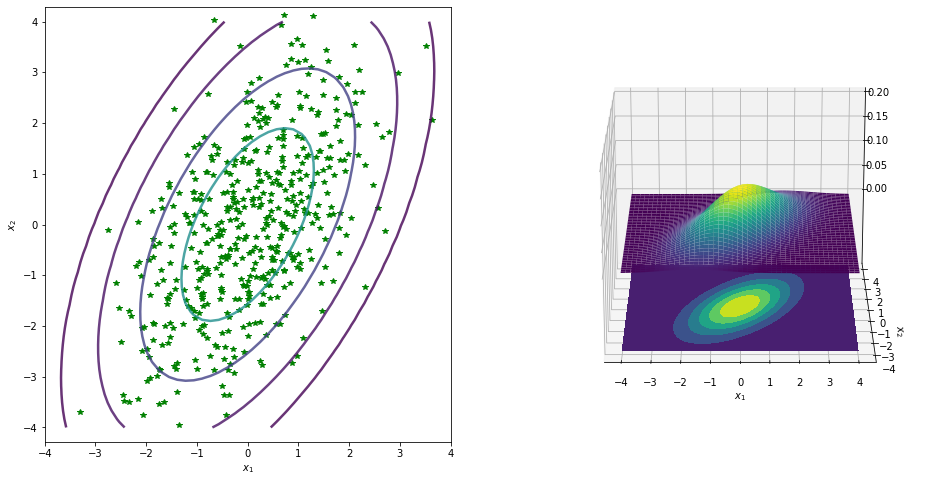

In [14]:
# Linear transformation
a = np.random.normal(size=(dim,dim))
# Apply the transformation
data_new = np.transpose(np.matmul(a,np.transpose(data)))
# Estimate the new covariance matrix
cov_new = np.zeros((dim,dim))
for dd in range(data.shape[0]):
  cov_new += np.outer(data_new[dd,:],data_new[dd,:])
cov_new /= data.shape[0]
# Plot
plot_data_gaussian(data_new,cov_new)
true_cov = np.matmul(a,np.transpose(a))
plot_data_gaussian(data_new,true_cov)

The covariance matrix of the new random variable is:
\begin{equation*}
\Sigma_{\textrm{new}} = \underbrace{A}_{\text{transform}} \cdot \underbrace{\Sigma}_{I_2} \cdot \underbrace{A^\top}_{\text{transform}} = AA^\top
\end{equation*}
This is why we call $A$ the **squared root** of $\Sigma_{\textrm{new}}$. We also say that $A$ is the Cholesky decomposition of $\Sigma_{\textrm{new}}$.

In [11]:
print('Estimated covariance matrix')
print_matrix(cov_new)
print('True covariance matrix')
print_matrix(true_cov)


Estimated covariance matrix
3.067	1.522	
1.522	6.656	
True covariance matrix
3.152	1.723	
1.723	6.969	
